In [1]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('GooglePurchaseOrderHarshVMIV1Results842.xlsx - GooglePurchaseOrderHarshVMIVRe (1).csv')
df

,Internal ID,PO DATE,Purchase Order #,MPN,GPN,Cost,Vendor Name,PO Status,PO Quantity,IR #,IR Date,IR Quantity,No Of Days,PO-IR,Created By,Created By.1,Quantity Fulfilled/Received
0,2948549,12/28/2023,PO10074653,07054957,07054957,3.03000,"VEN001382 Scandic Springs, Inc",Closed,692.0,,NaN,NaN,NaN,NaN,Maricris Reyes,NaN,0.0
1,3746860,4/11/2023,PO10079868,1026275,NaN,9701.73000,Boon Edam Inc.,Pending Receipt,1.0,,NaN,NaN,NaN,NaN,Mukesh Kumar,NaN,0.0
2,3746860,4/11/2023,PO10079868,1026276,NaN,9701.73000,Boon Edam Inc.,Pending Receipt,1.0,,NaN,NaN,NaN,NaN,Mukesh Kumar,NaN,0.0
3,3746860,4/11/2023,PO10079868,1026366,NaN,328.61000,Boon Edam Inc.,Pending Receipt,1.0,,NaN,NaN,NaN,NaN,Mukesh Kumar,NaN,0.0
4,3746986,4/11/2023,PO20036518,13-488P,1116564,22195.55991,VEN012538 Hamapo B.V.,Pending Receipt,1.0,,NaN,NaN,NaN,NaN,Vibhor Jain,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42963,17114,6/6/2019,PO10000307,SOL-EC002-GY .,NaN,75.00000,PWB Solutions,Fully Billed,18.0,Item Receipt #IR0003643,8/28/2019,18.0,83.0,0.0,Chi Y Liu,Chetan Brahmkshatriya,18.0
42964,15703,6/5/2019,PO10000094,IM-125-138-37280,NaN,382.89000,InterMetro Industries Corporation,Fully Billed,30.0,Item Receipt #IR0001013,7/1/2019,30.0,26.0,0.0,Ivy Jiang,Chetan Brahmkshatriya,30.0
42965,12573,6/4/2019,PO0010299,24728C,07125286,240.95000,Global Equipment Company Inc.,Fully Billed,21.0,Item Receipt #IR0001444,7/12/2019,21.0,38.0,0.0,Prajakta Joshi,Chetan Brahmkshatriya,21.0
42966,13599,6/4/2019,PO10000031,PT7406-4C,07087974,349.00000,"ACME Construction Supply Co., Inc.",Fully Billed,40.0,Item Receipt #IR0001918,7/23/2019,28.0,49.0,12.0,Prajakta Joshi,Chetan Brahmkshatriya,40.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42968 entries, 0 to 42967
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Internal ID                  42968 non-null  int64  
 1   PO DATE                      42968 non-null  object 
 2   Purchase Order #             42968 non-null  object 
 3   MPN                          42968 non-null  object 
 4   GPN                          36024 non-null  object 
 5   Cost                         42954 non-null  float64
 6   Vendor Name                  42968 non-null  object 
 7   PO Status                    42967 non-null  object 
 8   PO Quantity                  42968 non-null  float64
 9   IR #                         42968 non-null  object 
 10  IR Date                      39216 non-null  object 
 11  IR Quantity                  39216 non-null  float64
 12  No Of Days                   39216 non-null  float64
 13  PO-IR           

In [20]:
# convering date columns into datetime 
df['PO DATE'] = pd.to_datetime(df['PO DATE'])
df['IR Date'] = pd.to_datetime(df['IR Date'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42968 entries, 0 to 42967
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Internal ID                  42968 non-null  int64         
 1   PO DATE                      42968 non-null  datetime64[ns]
 2   Purchase Order #             42968 non-null  object        
 3   MPN                          42968 non-null  object        
 4   GPN                          36024 non-null  object        
 5   Cost                         42954 non-null  float64       
 6   Vendor Name                  42968 non-null  object        
 7   PO Status                    42967 non-null  object        
 8   PO Quantity                  42968 non-null  float64       
 9   IR #                         42968 non-null  object        
 10  IR Date                      39216 non-null  datetime64[ns]
 11  IR Quantity                  39216 non-nu

In [30]:
# What is the string and ending date in the data
print(df['PO DATE'].min())
print(df['PO DATE'].max())

2019-06-04 00:00:00
2023-12-28 00:00:00


In [21]:
# what are the diffrent categorirs in PO Status
df['PO Status'].value_counts()

Fully Billed                          35884
Closed                                 2995
Pending Receipt                        1981
Partially Received                     1827
Pending Bill                            155
Pending Billing/Partially Received      125
Name: PO Status, dtype: int64

In [22]:
# Null values in IR Date
df['IR Date'].isna().sum()

3752

In [97]:
# Creating dataframe 
df1 = df[['Purchase Order #','Vendor Name','MPN','PO DATE','IR Date','PO Quantity','IR Quantity','PO-IR','PO Status','No Of Days']]
df1

,Purchase Order #,Vendor Name,MPN,PO DATE,IR Date,PO Quantity,IR Quantity,PO-IR,PO Status,No Of Days
0,PO10074653,"VEN001382 Scandic Springs, Inc",07054957,2023-12-28,NaT,692.0,NaN,NaN,Closed,NaN
1,PO10079868,Boon Edam Inc.,1026275,2023-04-11,NaT,1.0,NaN,NaN,Pending Receipt,NaN
2,PO10079868,Boon Edam Inc.,1026276,2023-04-11,NaT,1.0,NaN,NaN,Pending Receipt,NaN
3,PO10079868,Boon Edam Inc.,1026366,2023-04-11,NaT,1.0,NaN,NaN,Pending Receipt,NaN
4,PO20036518,VEN012538 Hamapo B.V.,13-488P,2023-04-11,NaT,1.0,NaN,NaN,Pending Receipt,NaN
...,...,...,...,...,...,...,...,...,...,...
42963,PO10000307,PWB Solutions,SOL-EC002-GY .,2019-06-06,2019-08-28,18.0,18.0,0.0,Fully Billed,83.0
42964,PO10000094,InterMetro Industries Corporation,IM-125-138-37280,2019-06-05,2019-07-01,30.0,30.0,0.0,Fully Billed,26.0
42965,PO0010299,Global Equipment Company Inc.,24728C,2019-06-04,2019-07-12,21.0,21.0,0.0,Fully Billed,38.0
42966,PO10000031,"ACME Construction Supply Co., Inc.",PT7406-4C,2019-06-04,2019-07-23,40.0,28.0,12.0,Fully Billed,49.0


In [98]:
# Creating nan IR Date dataframe only that has nan values
nan_ir_date_df = df1[df1['IR Date'].isna()]
nan_ir_date_df

,Purchase Order #,Vendor Name,MPN,PO DATE,IR Date,PO Quantity,IR Quantity,PO-IR,PO Status,No Of Days
0,PO10074653,"VEN001382 Scandic Springs, Inc",07054957,2023-12-28,NaT,692.0,NaN,NaN,Closed,NaN
1,PO10079868,Boon Edam Inc.,1026275,2023-04-11,NaT,1.0,NaN,NaN,Pending Receipt,NaN
2,PO10079868,Boon Edam Inc.,1026276,2023-04-11,NaT,1.0,NaN,NaN,Pending Receipt,NaN
3,PO10079868,Boon Edam Inc.,1026366,2023-04-11,NaT,1.0,NaN,NaN,Pending Receipt,NaN
4,PO20036518,VEN012538 Hamapo B.V.,13-488P,2023-04-11,NaT,1.0,NaN,NaN,Pending Receipt,NaN
...,...,...,...,...,...,...,...,...,...,...
42673,PO10013797,Cable Management Solutions,CM 708-75-11066,2019-09-10,NaT,527.0,NaN,NaN,Closed,NaN
42759,PO10012356,Anixter Inc,CM-708-75-11056_DNU,2019-08-06,NaT,82.0,NaN,NaN,Closed,NaN
42887,PO10010614,VEN001540 Cole-Parmer,39755-25,2019-06-20,NaT,2.0,NaN,NaN,Closed,NaN
42921,PO10000504,PWB Solutions,ECX-RCU-CONDEN-TRAY,2019-06-11,NaT,2.0,NaN,NaN,Closed,NaN


In [99]:
nan_ir_date_df.to_csv('nan_data.csv')

In [49]:
print(nan_ir_date_df['PO DATE'].min())
print(nan_ir_date_df['PO DATE'].max())

2019-06-06 00:00:00
2023-12-28 00:00:00


In [100]:
# getting value count of PO Status in the nan dataframe 
nan_ir_date_df['PO Status'].value_counts()

Pending Receipt                       1981
Closed                                1479
Partially Received                     275
Pending Billing/Partially Received       8
Pending Bill                             6
Fully Billed                             2
Name: PO Status, dtype: int64

In [101]:
# Dropping nan values and creating the new dataframe without nan values
df_non_na = df1.dropna()
df_non_na

,Purchase Order #,Vendor Name,MPN,PO DATE,IR Date,PO Quantity,IR Quantity,PO-IR,PO Status,No Of Days
26,PO10079852,"Google,Inc",CM8064401610101,2023-04-11,2023-04-11,20.0,20.0,0.0,Fully Billed,0.0
27,PO10079852,"Google,Inc",EX4300-48T-DC-CPO,2023-04-11,2023-04-11,10.0,10.0,0.0,Fully Billed,0.0
117,PO10079789,"Cal Pack Crating, Inc",Crate Charge,2023-04-09,2023-04-10,1.0,1.0,0.0,Fully Billed,1.0
199,PO10079795,"Google,Inc",2181230-6,2023-04-06,2023-04-11,1.0,1.0,0.0,Fully Billed,5.0
200,PO10079795,"Google,Inc",2328622-2,2023-04-06,2023-04-11,1.0,1.0,0.0,Fully Billed,5.0
...,...,...,...,...,...,...,...,...,...,...
42963,PO10000307,PWB Solutions,SOL-EC002-GY .,2019-06-06,2019-08-28,18.0,18.0,0.0,Fully Billed,83.0
42964,PO10000094,InterMetro Industries Corporation,IM-125-138-37280,2019-06-05,2019-07-01,30.0,30.0,0.0,Fully Billed,26.0
42965,PO0010299,Global Equipment Company Inc.,24728C,2019-06-04,2019-07-12,21.0,21.0,0.0,Fully Billed,38.0
42966,PO10000031,"ACME Construction Supply Co., Inc.",PT7406-4C,2019-06-04,2019-07-23,40.0,28.0,12.0,Fully Billed,49.0


In [102]:
df_non_na = df_non_na.reset_index(drop=True)
df_non_na

,Purchase Order #,Vendor Name,MPN,PO DATE,IR Date,PO Quantity,IR Quantity,PO-IR,PO Status,No Of Days
0,PO10079852,"Google,Inc",CM8064401610101,2023-04-11,2023-04-11,20.0,20.0,0.0,Fully Billed,0.0
1,PO10079852,"Google,Inc",EX4300-48T-DC-CPO,2023-04-11,2023-04-11,10.0,10.0,0.0,Fully Billed,0.0
2,PO10079789,"Cal Pack Crating, Inc",Crate Charge,2023-04-09,2023-04-10,1.0,1.0,0.0,Fully Billed,1.0
3,PO10079795,"Google,Inc",2181230-6,2023-04-06,2023-04-11,1.0,1.0,0.0,Fully Billed,5.0
4,PO10079795,"Google,Inc",2328622-2,2023-04-06,2023-04-11,1.0,1.0,0.0,Fully Billed,5.0
...,...,...,...,...,...,...,...,...,...,...
39211,PO10000307,PWB Solutions,SOL-EC002-GY .,2019-06-06,2019-08-28,18.0,18.0,0.0,Fully Billed,83.0
39212,PO10000094,InterMetro Industries Corporation,IM-125-138-37280,2019-06-05,2019-07-01,30.0,30.0,0.0,Fully Billed,26.0
39213,PO0010299,Global Equipment Company Inc.,24728C,2019-06-04,2019-07-12,21.0,21.0,0.0,Fully Billed,38.0
39214,PO10000031,"ACME Construction Supply Co., Inc.",PT7406-4C,2019-06-04,2019-07-23,40.0,28.0,12.0,Fully Billed,49.0


In [104]:
df_non_na.to_csv('cleaned_data.csv')

In [106]:
data = pd.read_csv('cleaned_data.csv')
data

,Unnamed: 0,Purchase Order #,Vendor Name,MPN,PO DATE,IR Date,PO Quantity,IR Quantity,PO-IR,PO Status,No Of Days
0,0,PO10079852,"Google,Inc",CM8064401610101,2023-04-11,2023-04-11,20.0,20.0,0.0,Fully Billed,0.0
1,1,PO10079852,"Google,Inc",EX4300-48T-DC-CPO,2023-04-11,2023-04-11,10.0,10.0,0.0,Fully Billed,0.0
2,2,PO10079789,"Cal Pack Crating, Inc",Crate Charge,2023-04-09,2023-04-10,1.0,1.0,0.0,Fully Billed,1.0
3,3,PO10079795,"Google,Inc",2181230-6,2023-04-06,2023-04-11,1.0,1.0,0.0,Fully Billed,5.0
4,4,PO10079795,"Google,Inc",2328622-2,2023-04-06,2023-04-11,1.0,1.0,0.0,Fully Billed,5.0
...,...,...,...,...,...,...,...,...,...,...,...
39211,39211,PO10000307,PWB Solutions,SOL-EC002-GY .,2019-06-06,2019-08-28,18.0,18.0,0.0,Fully Billed,83.0
39212,39212,PO10000094,InterMetro Industries Corporation,IM-125-138-37280,2019-06-05,2019-07-01,30.0,30.0,0.0,Fully Billed,26.0
39213,39213,PO0010299,Global Equipment Company Inc.,24728C,2019-06-04,2019-07-12,21.0,21.0,0.0,Fully Billed,38.0
39214,39214,PO10000031,"ACME Construction Supply Co., Inc.",PT7406-4C,2019-06-04,2019-07-23,40.0,28.0,12.0,Fully Billed,49.0


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39216 entries, 0 to 39215
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        39216 non-null  int64  
 1   Purchase Order #  39216 non-null  object 
 2   Vendor Name       39216 non-null  object 
 3   MPN               39216 non-null  object 
 4   PO DATE           39216 non-null  object 
 5   IR Date           39216 non-null  object 
 6   PO Quantity       39216 non-null  float64
 7   IR Quantity       39216 non-null  float64
 8   PO-IR             39216 non-null  float64
 9   PO Status         39216 non-null  object 
 10  No Of Days        39216 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 3.3+ MB


### The dataset consists of 39,216 entries and 11 columns, as detailed below:

Purchase Order #: The purchase order number, a categorical feature.

MPN: Manufacturer Part Number, another categorical feature.

PO DATE: The date the purchase order was made, a datetime feature.

IR Date: The date the Invoice Receipt (IR) was recorded, a datetime feature.

PO Quantity: The quantity ordered in the purchase order, a numerical feature.

IR Quantity: The quantity recorded in the invoice receipt, a numerical feature.

PO-IR: The difference between the purchase order quantity and the invoice receipt quantity, a numerical feature.

PO Status: The status of the purchase order, a categorical feature.

No Of Days: The number of days from the purchase order date to the invoice receipt date, a numerical feature that seems to be our target variable for lead time calculation.

In [108]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [109]:
# Convert 'PO DATE' and 'IR Date' to datetime format
data['PO DATE'] = pd.to_datetime(data['PO DATE'])
data['IR Date'] = pd.to_datetime(data['IR Date'])

In [110]:
# Display the statistical summary of numerical features
numerical_summary = data.describe()

numerical_summary

,PO Quantity,IR Quantity,PO-IR,No Of Days
count,3.921600e+04,3.921600e+04,3.921600e+04,39216.000000
mean,3.490950e+02,1.519654e+02,1.971296e+02,60.285011
std,2.042044e+04,1.012366e+04,1.550171e+04,67.407952
min,5.000000e-01,5.000000e-01,-2.000000e+00,-24.000000
25%,2.000000e+00,2.000000e+00,0.000000e+00,13.000000
50%,8.000000e+00,6.000000e+00,0.000000e+00,34.000000
75%,5.000000e+01,2.500000e+01,1.000000e+00,86.000000
max,2.308043e+06,1.964831e+06,2.144711e+06,784.000000


## Statistical Summary
Numerical Features:

1. PO Quantity, IR Quantity: Values vary widely, with maximum values much higher than average, there are outliers and a skewed distribution. 

2. PO-IR: Differences between PO and IR quantities also exhibit outliers and a skewed distribution.

3. No Of Days (Target Variable): Average lead time is around 60 days, but it varies significantly, ranging from negative values to over two years. The presence of negative lead times requires further investigation as it may indicate data errors (IR Date occurring before PO Date).

In [112]:
# Display the distribution of categorical features
categorical_columns = ['Purchase Order #', 'MPN', 'PO Status','Vendor Name']
categorical_summary = data[categorical_columns].describe()
categorical_summary

,Purchase Order #,MPN,PO Status,Vendor Name
count,39216,39216,39216,39216
unique,20104,7445,5,859
top,PO10019410,JOB MATERIAL,Fully Billed,Graybar Electric Co.
freq,574,288,35882,3794


## Categorical Features

1. Purchase Order #: There are 20,104 unique purchase orders in the dataset, with some orders occurring more frequently.


2. MPN (Manufacturer Part Number): The dataset contains 7,445 unique part numbers, indicating a wide variety of items.


3. PO Status: There are 5 unique statuses, with "Fully Billed" being the most common status.

4. Vendor Name: There are 859 unique venders with "Graybar Electric Co." beaing the most common vendor.

## Data Insights
1. Outlier Analysis
2. Temporal Trends
3. Categorical Feature Analysis
4. Feature Relationships

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

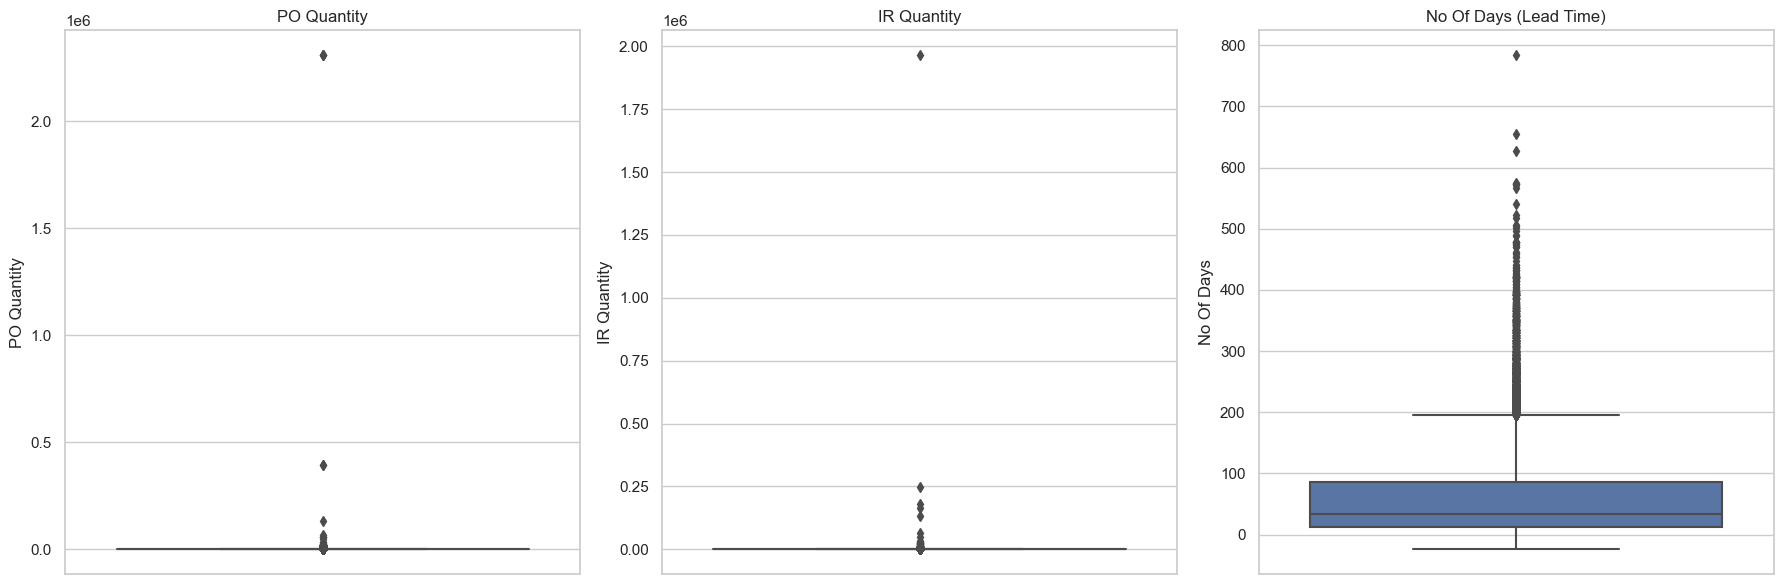

In [86]:
sns.set(style="whitegrid")

# Outlier Analysis with box plots for 'PO Quantity', 'IR Quantity', and 'No Of Days'
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(y=data['PO Quantity'], ax=axs[0])
axs[0].set_title('PO Quantity')

sns.boxplot(y=data['IR Quantity'], ax=axs[1])
axs[1].set_title('IR Quantity')

sns.boxplot(y=data['No Of Days'], ax=axs[2])
axs[2].set_title('No Of Days (Lead Time)')

plt.tight_layout()
plt.show()


## 1 .Outlier Analysis
The box plots for PO Quantity, IR Quantity, and No Of Days reveal the presence of significant outliers in these features:
1. PO Quantity & IR Quantity: Both distributions have extreme outliers, with quantities far exceeding the majority of data points. These outliers could significantly impact the model's performance and might need to be addressed, either by removing them or applying transformations to reduce their influence.
2. No Of Days (Lead Time): Similarly, the lead time distribution shows outliers, with some lead times being unusually high. These outliers might represent special cases in the procurement process but could also skew predictive modeling efforts.

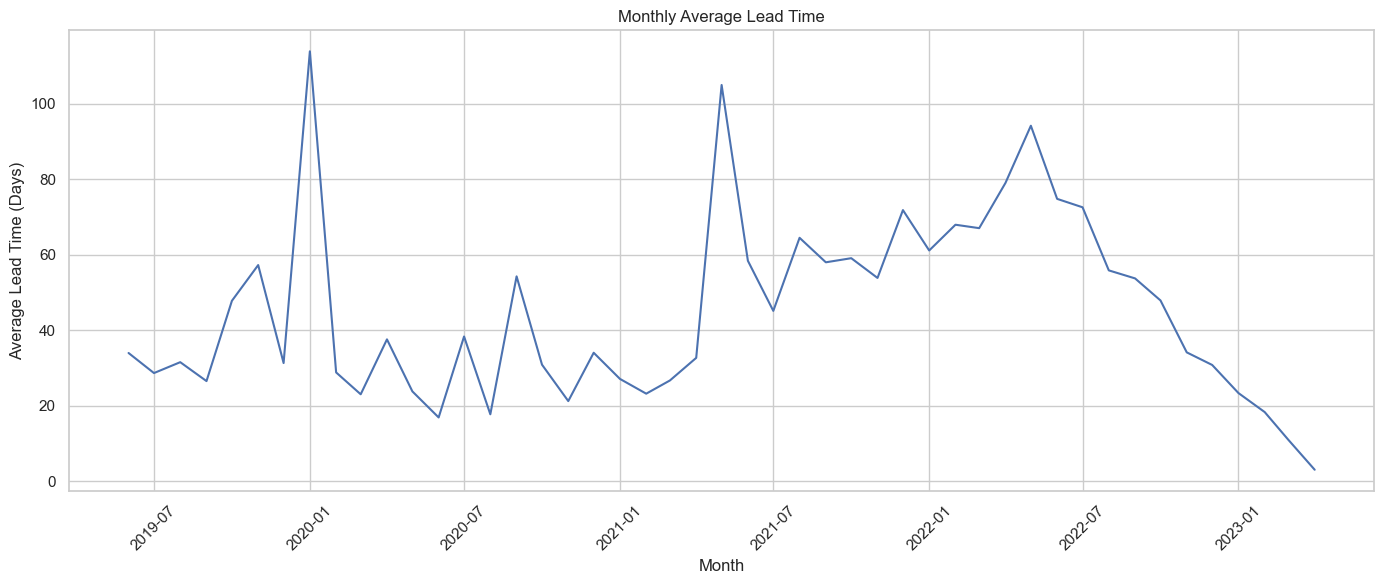

In [87]:
# Temporal Trend Analysis for 'No Of Days'
# Creating a monthly average of 'No Of Days'
data['YearMonth'] = data['PO DATE'].dt.to_period('M')
monthly_lead_time = data.groupby('YearMonth')['No Of Days'].mean().reset_index()
monthly_lead_time['YearMonth'] = monthly_lead_time['YearMonth'].dt.to_timestamp()

# Plotting the temporal trend
plt.figure(figsize=(14, 6))
sns.lineplot(x='YearMonth', y='No Of Days', data=monthly_lead_time)
plt.title('Monthly Average Lead Time')
plt.xlabel('Month')
plt.ylabel('Average Lead Time (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2 .Temporal Trend Analysis
The line plot of the monthly average lead time shows variations over time, suggesting that the lead time might be influenced by factors varying across months.

### Strategies for data handelling
1. Outlier Handling: Apply strategies for managing outliers, such as winsorization(percenntile imputation), log transformations, or robust scaling.
2. Feature Engineering: Include time-based features (e.g., month of the year) to capture temporal trends in lead time.
3. Categorical Feature Encoding: For categorical variables like PO Status and MPN, use encoding techniques suitable for machine learning models, such as one-hot encoding or target encoding.

In [89]:
# Correlation matrix among numerical features
correlation_matrix = data[['PO Quantity', 'IR Quantity', 'PO-IR', 'No Of Days']].corr()
correlation_matrix

,PO Quantity,IR Quantity,PO-IR,No Of Days
PO Quantity,1.000000,0.675230,0.876332,-0.001330
IR Quantity,0.675230,1.000000,0.236415,-0.000176
PO-IR,0.876332,0.236415,1.000000,-0.001637
No Of Days,-0.001330,-0.000176,-0.001637,1.000000


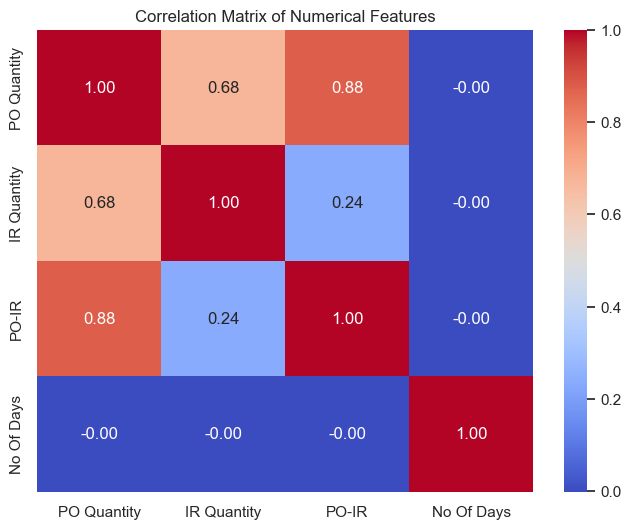

In [91]:
# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Correlation Analysis
The correlation matrix reveals the following insights:


PO Quantity & No Of Days: There's a very low correlation between PO Quantity and No Of Days, suggesting that the quantity ordered does not linearly influence the lead time.

IR Quantity & No Of Days: Similarly, IR Quantity shows a very low linear correlation with No Of Days.

PO-IR & No Of Days: The difference between PO and IR quantities also has a negligible linear correlation with lead time.

    
These findings indicate that linear relationships between the quantities involved in orders and the lead time are minimal. This suggests that predicting lead time may require focusing on other features or using machine learning models that can capture non-linear relationships.

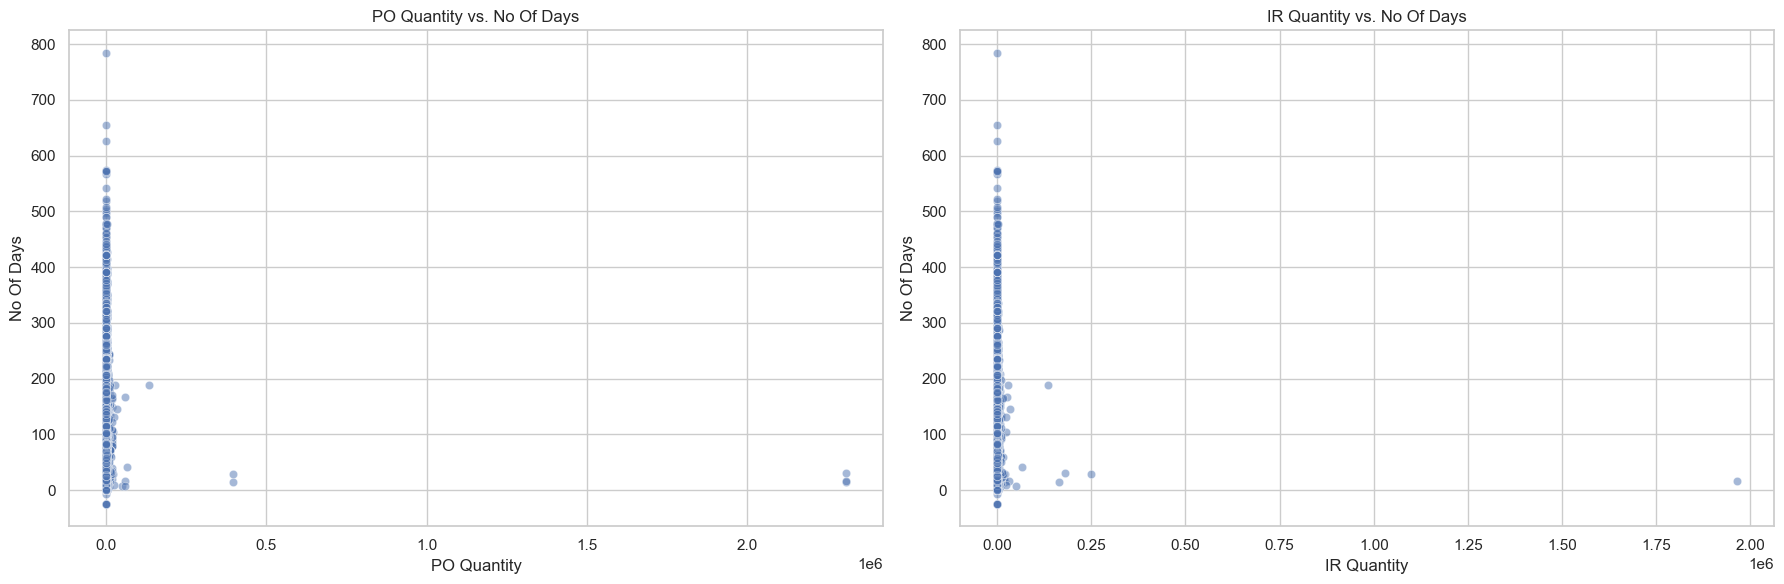

In [92]:
# Scatter plots for 'PO Quantity', 'IR Quantity' against 'No Of Days'
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

sns.scatterplot(x='PO Quantity', y='No Of Days', data=data, ax=axs[0], alpha=0.5)
axs[0].set_title('PO Quantity vs. No Of Days')

sns.scatterplot(x='IR Quantity', y='No Of Days', data=data, ax=axs[1], alpha=0.5)
axs[1].set_title('IR Quantity vs. No Of Days')

plt.tight_layout()
plt.show()

## Scatter Plot Analysis
The scatter plots of PO Quantity and IR Quantity against No Of Days further illustrate the lack of clear linear relationships. The plots show a wide dispersion of points without a discernible pattern, underscoring the challenges in using these features directly for linear predictive modeling.

## 3. Categorical Feature Analysis

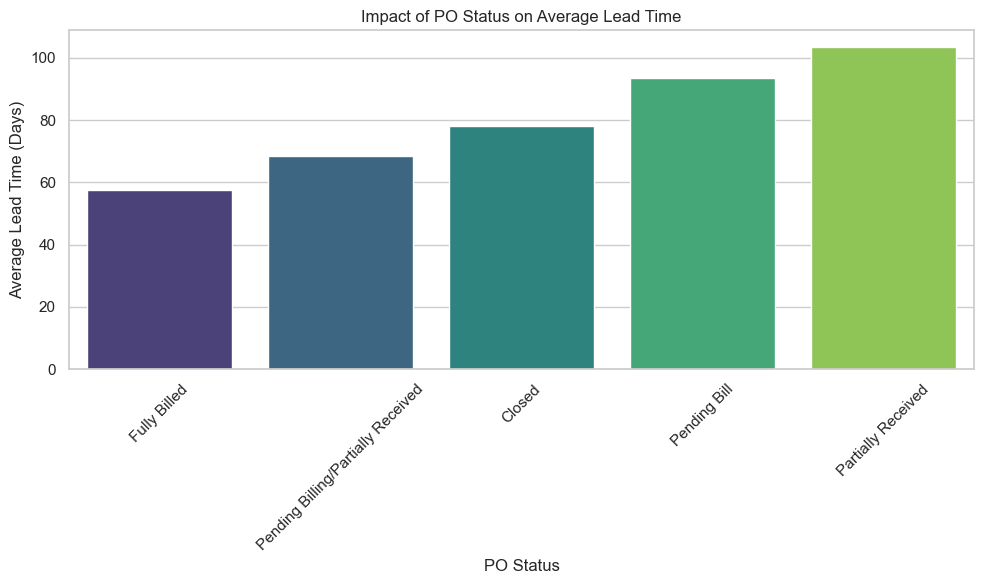

In [94]:
# Analyzing the impact of PO Status on lead time
po_status_impact = data.groupby('PO Status')['No Of Days'].mean().sort_values()

# Plotting the impact of PO Status on lead time
plt.figure(figsize=(10, 6))
sns.barplot(x=po_status_impact.index, y=po_status_impact.values, palette="viridis")
plt.title('Impact of PO Status on Average Lead Time')
plt.xlabel('PO Status')
plt.ylabel('Average Lead Time (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## PO Status Impact on Lead Time
The average lead time across different PO Status categories. It reveals significant variations in lead time based on the status of the purchase order. This suggests that the processing time can differ markedly depending on the order's status, which could be a critical feature for predicting lead time in your machine learning model.

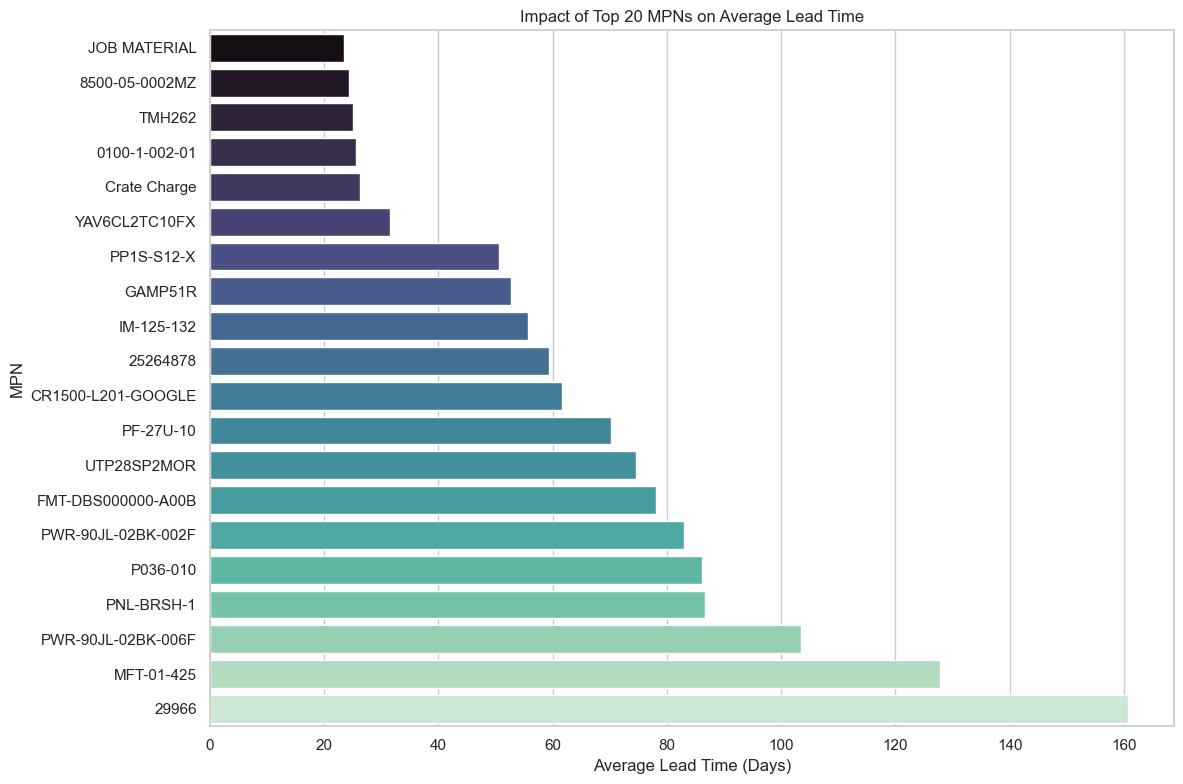

In [95]:
# Analyzing the impact of MPN on lead time for the top 20 most frequent MPNs
top_mpn_impact = data['MPN'].value_counts().head(20).index
mpn_lead_time = data[data['MPN'].isin(top_mpn_impact)].groupby('MPN')['No Of Days'].mean().sort_values()

# Plotting the impact of MPN on lead time for the top 20 most frequent MPNs
plt.figure(figsize=(12, 8))
sns.barplot(x=mpn_lead_time.values, y=mpn_lead_time.index, palette="mako")
plt.title('Impact of Top 20 MPNs on Average Lead Time')
plt.xlabel('Average Lead Time (Days)')
plt.ylabel('MPN')
plt.tight_layout()
plt.show()

## MPN Impact on Lead Time
The average lead time for the top 20 most frequently occurring Manufacturer Part Numbers (MPNs) in the dataset. There's noticeable variation in lead times among these MPNs, indicating that certain parts may inherently have longer or shorter lead times due to factors like availability, manufacturing time, or supplier efficiency.

In [114]:
# Analyzing the distribution of Vendor Name
vendor_distribution = data['Vendor Name'].value_counts()
vendor_distribution

Graybar Electric Co.                          3794
VEN009159 Shenzhen SDG Information Co Ltd     2240
VEN005784 Enconnex LLC (USA)                  1283
Ingram Micro                                  1216
PacTech                                       1072
                                              ... 
VEN002716 Data-Alliance                          1
VEN011643 Sure Power, Inc.                       1
VEN011650 Electric Motors & Specialties          1
VEN003922 Electronic Product Services, LLC       1
VEN011614 DOOR EQUIPMENT COMPANY, INC            1
Name: Vendor Name, Length: 859, dtype: int64

In [119]:
# Analyzing the impact of Vendor Name on lead time for the top 10 most frequent Vendors
top_vendors = vendor_distribution.head(20).index
vendor_lead_time_impact = data[data['Vendor Name'].isin(top_vendors)].groupby('Vendor Name')['No Of Days'].mean().sort_values()

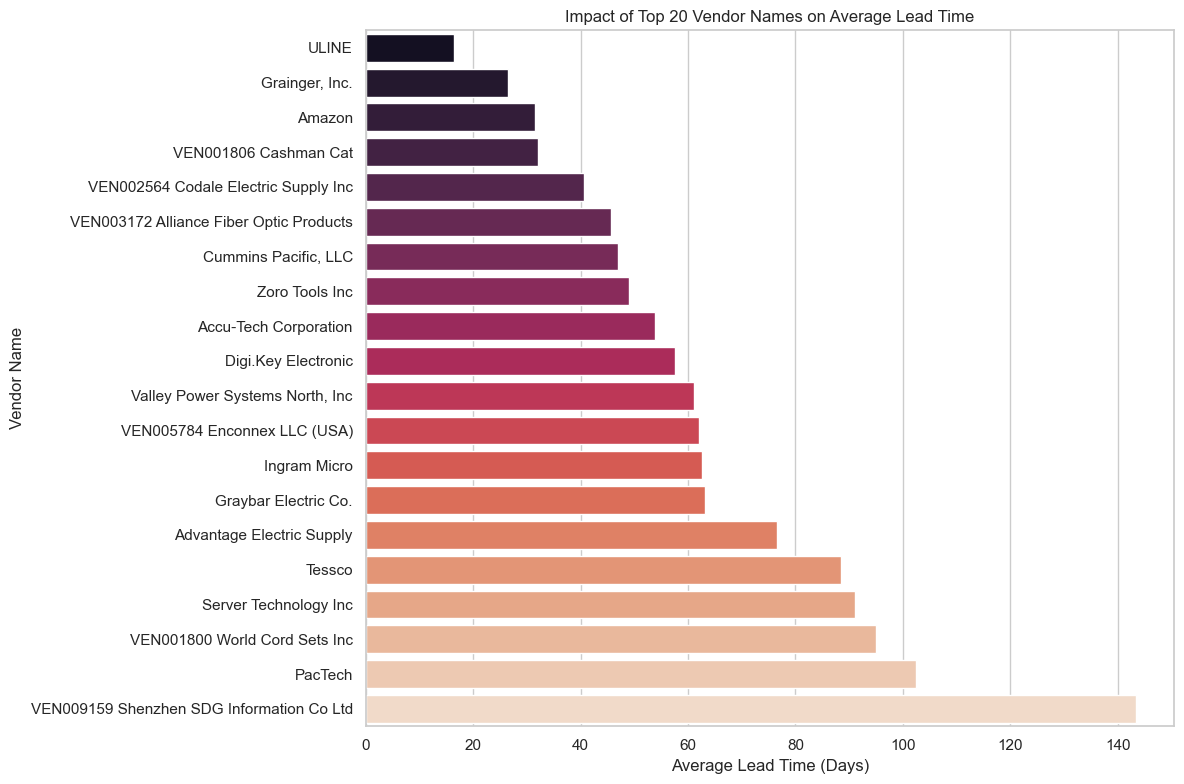

In [120]:
# Plotting the impact of Vendor Name on lead time for the top 20 most frequent Vendors
plt.figure(figsize=(12, 8))
sns.barplot(y=vendor_lead_time_impact.index, x=vendor_lead_time_impact.values, palette="rocket")
plt.title('Impact of Top 20 Vendor Names on Average Lead Time')
plt.xlabel('Average Lead Time (Days)')
plt.ylabel('Vendor Name')
plt.tight_layout()
plt.show()

## Venders Imapct on Lead time
The impact of the top 20 most frequent Vendor Names on the average lead time. This visualization reveals significant variations in lead times among different vendors, suggesting that the choice of vendor can have a substantial impact on how long it takes for orders to be processed and completed.

## 4. Feature Relationships
1. Numeric vs. Numeric Relationships: A scatter plot of PO Quantity vs. IR Quantity
2. Categorical vs. Numeric Relationships: A box plot of No Of Days vs. t PO Status

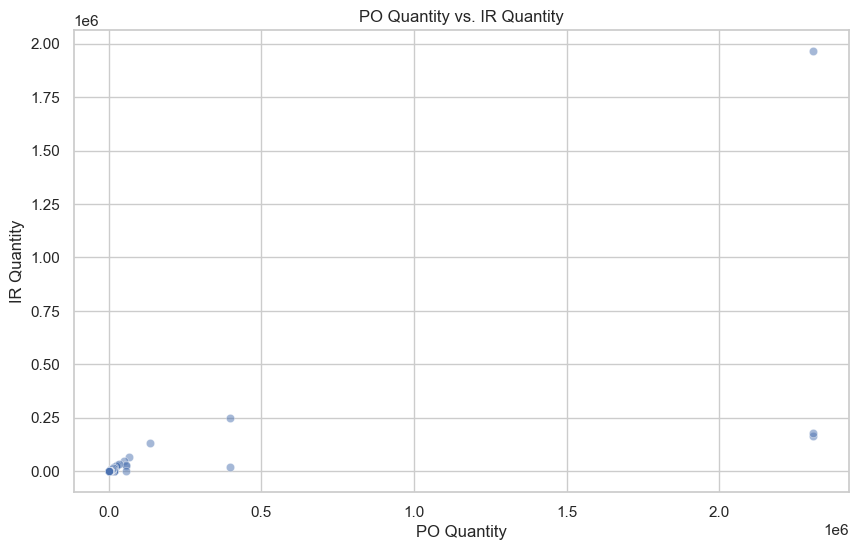

In [123]:
sns.set_style("whitegrid")

# Create a scatter plot for PO Quantity vs. IR Quantity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='PO Quantity', y='IR Quantity', alpha=0.5)
plt.title('PO Quantity vs. IR Quantity')
plt.xlabel('PO Quantity')
plt.ylabel('IR Quantity')
plt.show()

PO Quantity vs. IR Quantity Scatter Plot: This plot shows a positive relationship between PO Quantity and IR Quantity, indicating that as the quantity ordered increases, the quantity received tends to also increase. The spread suggests variability in how closely received quantities match ordered quantities, with most data points clustered at lower quantities.

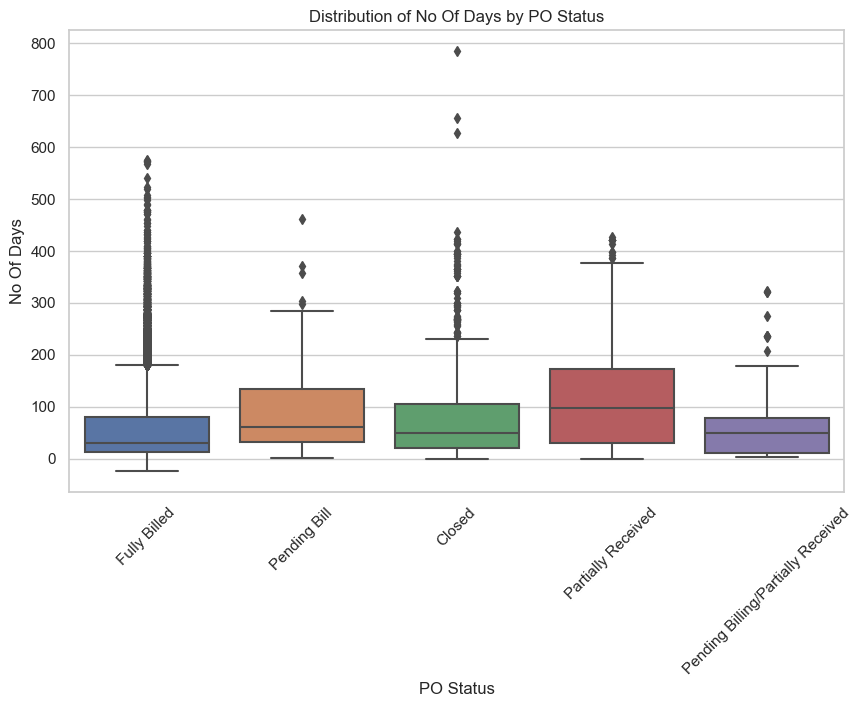

In [124]:
# Create a box plot for No Of Days by PO Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='PO Status', y='No Of Days')
plt.title('Distribution of No Of Days by PO Status')
plt.xticks(rotation=45)
plt.xlabel('PO Status')
plt.ylabel('No Of Days')
plt.show()

Distribution of No Of Days by PO Status Box Plot: 
This chart shows how long it takes to process orders (No Of Days) for different order statuses. We can see that the time it takes can be different depending on the order's status. Some orders take much longer or shorter than others, and there are a few cases that stand out because they are very different from the rest.

## statistical tests to further explore these relationships
- For PO Quantity vs. IR Quantity, calculate Pearson's correlation coefficient to quantify the strength of their linear relationship.
- For No Of Days by PO Status, an ANOVA test could be used to determine if there are statistically significant differences in the mean No Of Days across different PO Status categories, given that PO Status is a categorical variable with multiple levels.

In [126]:
from scipy import stats

In [128]:
# Pearson's correlation coefficient for PO Quantity vs. IR Quantity
correlation_coef, p_value = stats.pearsonr(data['PO Quantity'], data['IR Quantity'])

# ANOVA test for No Of Days by PO Status
anova_result = stats.f_oneway(*[data['No Of Days'][data['PO Status'] == status] for status in data['PO Status'].unique()])

correlation_coef, p_value, anova_result

(0.6752296898876353,
 0.0,
 F_onewayResult(statistic=216.0514069436033, pvalue=1.0124783204668364e-183))

- Pearson's Correlation Coefficient for PO Quantity vs. IR Quantity:

The correlation coefficient is approximately 0.675, confirming a moderate positive linear relationship between PO Quantity and IR Quantity. This indicates that as one increases, the other tends to increase as well.
The p-value is 0.0 (considering the precision of the output), suggesting that the correlation observed is statistically significant, and the likelihood that this correlation is due to chance is extremely low.



- ANOVA Test for No Of Days by PO Status:

The F-statistic is approximately 216.05, and the p-value is significantly low (around 1.01e-183), indicating that there are statistically significant differences in the mean No Of Days across different PO Status categories. This means that the processing time is likely to vary by the status of the purchase order, and these differences are not due to random chance.
These results provide a quantitative backing to the observations from the visualizations, highlighting meaningful relationships in the dataset. The significant p-values in both tests suggest that the observed relationships and differences are likely to be meaningful rather than coincidental.